In [1]:
%reload_ext autoreload
%autoreload 2
# %matplotlib widget
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas
import os
import georasters as gr

from geo_scripts.process_height import *


/home/benjamin/.pyenv/versions/3.7.3/envs/georasters/lib/python3.7/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/home/benjamin/.pyenv/versions/3.7.3/envs/georasters/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [3]:
geot = (-180.0, 1.0, 0.0, 90.0, 0.0, -1.0)
(xmin, xsize, x, ymax, y, ysize) = geot
base = np.ma.ones((180, 360))
raster = gr.GeoRaster(base, geot, nodata_value=0.0, fill_value=0.0, projection="+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

In [4]:
water_shape = geopandas.read_file(os.path.expanduser("~/Downloads/datasets/natural_earth/ne_50m_ocean/ne_50m_ocean.shp"))

In [5]:
rasterized_shape = rasterize_shapefile(water_shape, raster)

<IPython.core.display.Javascript object>


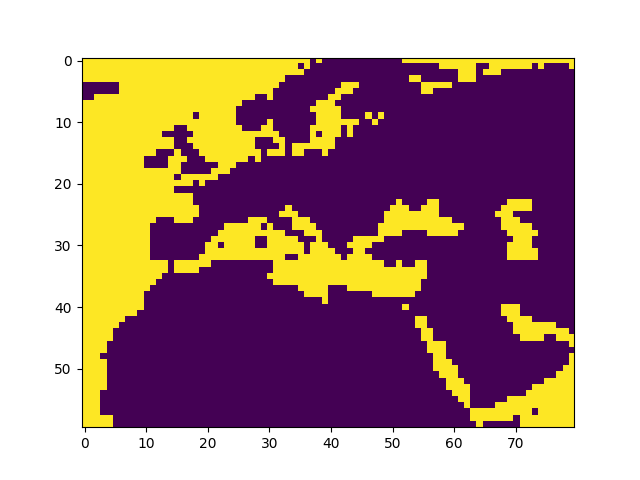

In [6]:
plt.imshow(rasterized_shape[20:80,160:240])

In [7]:
# build the shapefile into a validity raster
raster = get_global_raster(16)
rasterized_shape = rasterize_shapefile(water_shape, raster)
# plt.imshow(rasterized_shape)

[2880 5760]


<IPython.core.display.Javascript object>


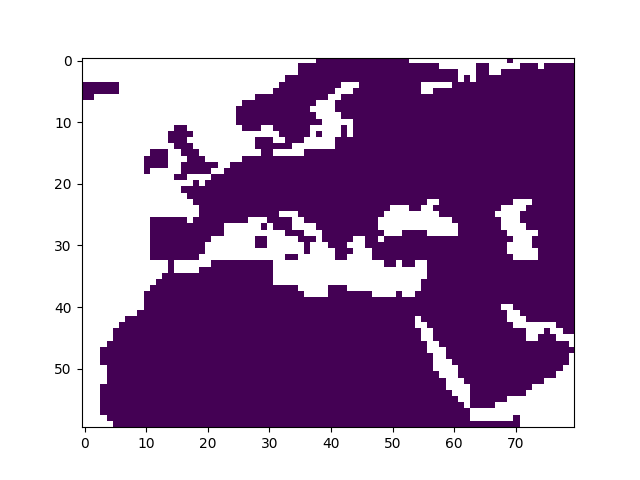

In [8]:
# aggregate this new raster
water_mask = rasterized_shape
raster.raster[water_mask] = np.ma.masked
x_ranges = list(gen_ranges(-180, 180, 1))
y_ranges = list(gen_ranges(90, -90, 1))
slices = get_slices(raster, x_ranges, y_ranges)
sl_ag = aggregate_slices(slices, filter_masked)
plt.imshow(sl_ag[20:80,160:240])

In [9]:
df_river = geopandas.read_file(os.path.expanduser("~/Downloads/datasets/natural_earth/ne_50m_rivers_lake_centerlines_scale_rank/ne_50m_rivers_lake_centerlines_scale_rank.shp"))
df_lake = geopandas.read_file(os.path.expanduser("~/Downloads/datasets/natural_earth/ne_50m_lakes/ne_50m_lakes.shp"))
df_lake_historic = geopandas.read_file(os.path.expanduser("~/Downloads/datasets/natural_earth/ne_50m_lakes_historic/ne_50m_lakes_historic.shp"))

raster = get_global_raster(1)
river_rasterized = rasterize_shapefile(df_river, raster)

# plt.imshow(river_rasterized)


[180 360]


<IPython.core.display.Javascript object>


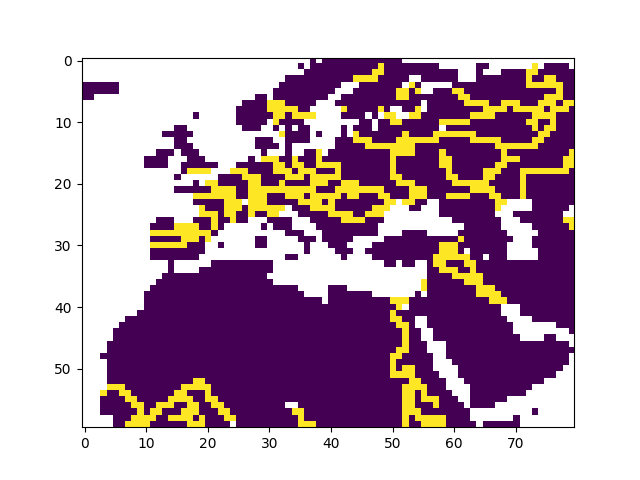

In [10]:
ocean = rasterize_shapefile(water_shape, raster)

lake_r = rasterize_shapefile(df_lake, raster)
lake_h_r = rasterize_shapefile(df_lake_historic, raster)
underwater = ocean | lake_r | lake_h_r

wr = np.ma.array(river_rasterized, mask=underwater)
# all_water = river_rasterized | water_rasterized
plt.imshow(wr[20:80,160:240])

In [66]:
water_rasterized

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])